FFR 120  
Felix Waldschock

HW 4
Exercise 14.4
## Implicit Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


# a.)
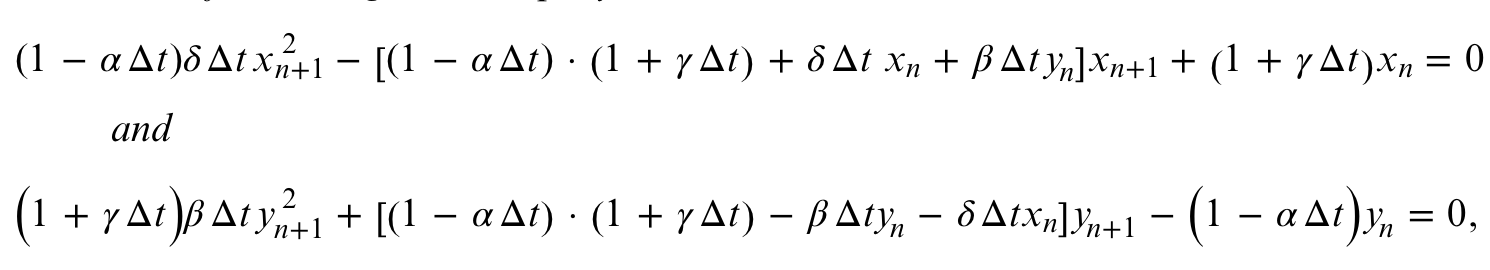

In [2]:
# parameters
alpha = 2/3
beta = 4/3
delta = 1
gamma = 1

# initial conditions
x0 = 1
y0 = 1
dT = 0.05
tMax = 20

N = int(tMax/dT)

In [3]:
def quadraticFormula(a,b,c):
    return np.array([(-b + np.sqrt(b**2 - 4*a*c))/(2*a), (-b - np.sqrt(b**2 - 4*a*c))/(2*a)])

In [4]:
def approximation(x_n, y_n, alpha, beta, delta, gamma, dT):
    # for x_n+1
    a_x = (1-dT*alpha)*dT*delta
    b_x = -((1-dT*alpha)*(1+dT*gamma)+dT*(delta*x_n+beta*y_n))
    c_x = (1+dT*gamma)*x_n

    # compute the solution with the quadratic formula
    sol = quadraticFormula(a_x, b_x, c_x)
    newx = sol[np.argmin(abs(sol-x_n))]
    
    a_y = (1+dT*gamma)*dT*beta
    b_y = ((1-dT*alpha)*(1+dT*gamma)-dT*(delta*x_n+beta*y_n))
    c_y = -(1-dT*alpha)*y_n

    # compute the solution with the quadratic formula
    sol = quadraticFormula(a_y, b_y, c_y)
    newy = sol[np.argmin(abs(sol-y_n))]

    return newx, newy


def implicitEulerIntegration(x0, y0, alpha, beta, delta, gamma, dT, N):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    for i in range(N-1):
        xn = x[i]
        yn = y[i]
        xT, yT = approximation(xn, yn, alpha, beta, delta, gamma, dT)

        # update x and y
        x[i+1] = xn + xT * (alpha - beta*yT) * dT
        y[i+1] = yn + yT * (delta*xT - gamma) * dT

    return x, y

In [5]:
# Compute the trajectories
x, y = implicitEulerIntegration(x0, y0, alpha, beta, delta, gamma, dT, N)
t = np.linspace(0, N*dT , N)

# c.) 
Value to invariant
- Is it constant in time? -> No it is not / sprialing

In [6]:
def conservedQuantity(x, y):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

In [7]:
C = conservedQuantity(x, y)

# Visualize

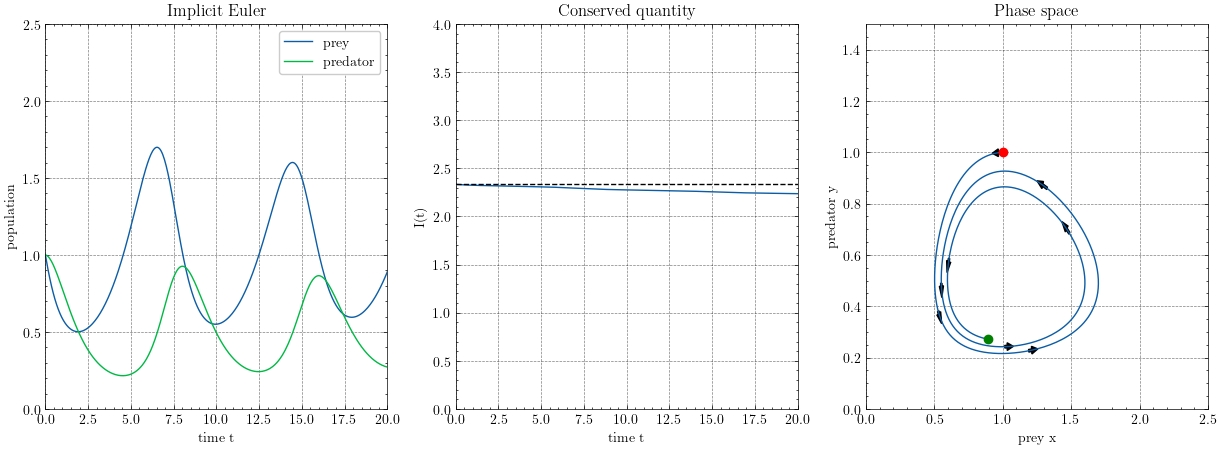

In [8]:
# Plot the data
# create a subplot with 1x3 grid and set the size to 15x5
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].plot(t, x, label='prey')
ax[0].plot(t, y, label='predator')
ax[0].set_xlabel('time t')
ax[0].set_ylabel('population')
ax[0].set_title('Implicit Euler')
ax[0].legend()
ax[0].set_xlim(0, tMax)
ax[0].set_ylim(0, 2.5)

# second plot -> Conserved quantitity I(x,y)
ax[1].plot(t, C)
ax[1].set_xlabel('time t')
ax[1].set_ylabel('I(t)')
ax[1].set_title('Conserved quantity')
ax[1].set_xlim(0, tMax)
ax[1].set_ylim(0, 4)
# plot a horizontal line at the initial value
ax[1].axhline(C[0], color='black', linestyle='--')

# third plot -> phase space
ax[2].plot(x, y)
ax[2].set_xlabel('prey x')
ax[2].set_ylabel('predator y')
ax[2].set_title('Phase space')
ax[2].set_xlim(0, 2.5)
ax[2].set_ylim(0, 1.5)

# mark the initial position with a red dot, and the final position with a green dot
ax[2].plot(x0, y0, 'ro')
ax[2].plot(x[-1], y[-1], 'go')

# show the direction of the flow with some arrows on the trajectory
for i in range(0, N, 50):
    ax[2].arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0.01, color='black')

